# Aprendizaje Automático - Práctica 1 - Experimentación con clasificadores y regresores

#### Valoración máxima: 10 puntos

#### Fecha límite de entrega: 14 de Abril de 2024 a las 23:59

#### Entrega a través de https://pradogrado2324.ugr.es/

### Nombre completo: <mark>Eduardo Rodríguez Cao</mark>



---


**Normas de desarrollo y entrega de trabajos**

- Única y exclusivamente se debe entregar este Notebook de Colab (fichero `.ipynb`) o, en su defecto, tres Notebooks de Colab (uno con cada ejercicio). No es necesario entregar ninguna memoria externa (por ejemplo, en `.pdf`).

- El código debe estar bien comentado (explicando lo que realizan los distintos apartados y/o bloques), y todas las decisiones tomadas y el trabajo desarrollado (incluyendo los conceptos fundamentales subyacentes) deben documentarse ampliamente en celdas de texto. Es obligatorio documentar las valoraciones y decisiones adoptadas en el desarrollo de cada uno de los apartados. Debe incluirse también tanto una descripción de las principales funciones (Python/scikit-learn) empleadas (para mostrar que el alumno comprende, a nivel técnico, lo que está haciendo), como una valoración razonada sobre la calidad de los resultados obtenidos. Sin esta documentación, se considera que el trabajo NO ha sido presentado.

- La entrega en PRADO está configurada para permitir sucesivas entregas de la práctica. Desde este punto de vista, se recomienda subir versiones de la práctica a medida que se van realizando los distintos ejercicios propuestos, y no dejarlo todo para el final.  

- Se debe respetar la estructura y secciones del Notebook. Esto servirá para agilizar las correcciones, así como para identificar con facilidad qué ejercicio/apartado se está respondiendo.

- El código NO puede escribir nada a disco.

- El path de lectura desde Google Drive debe ser siempre el mismo, que es el que se indica en este Notebook.

- Una entrega es apta para ser corregida si se puede ejecutar de principio a fin sin errores. Es decir, un ejercicio con errores de ejecución tendrá una calificación de 0.

- No es válido usar opciones en las entradas (es decir, utilizar el comando `input()`, por ejemplo, para que el usuario escoja el valor de las variables para ejecutar el programa). Para ello, se deben fijar al comienzo los valores
por defecto que se consideren óptimos o que se soliciten en el enunciado.

- Se entrega solamente este Notebook, y no los datos empleados.


---

**IMPORTANTE**

En el desarollo de esta práctica he tirado muchísimo del libro Hands on Machine Learning, porque sin él estaba perdidísimo. Me tuve que leer los 8 primeros capítulos para entender lo que se pedía y muchas cosas que aparecen aquí son adaptaciones del código de los Notebooks de Aurélien Géron, el autor del libro. Además he usado mucho ChatGPT para generar código de visualización de tablas, gráficas, etc. He considerado que en el poco tiempo que tenía para hacer la práctica prefiero centrarme en aprender cosas de la asignatura y delegar las cosas mecánicas a ChatGPT, dándole prioridad a aprender sklearn antes que los detalles de matplotlib, numpy, pandas, y ciertas destrezas que hay que tener con python en general. Aun así, me ha gustado mucho el contenido de la asignatura, aunque no he podido hacer todo lo que quería.

## <font color='blue'>Ejercicio 1: EL PROBLEMA DEL SOBREAJUSTE (2 puntos)</font>

<font color='blue'>Aprendizaje Automático (AA) es la rama de la Inteligencia Artificial (IA) que se ocupa de diseñar e implementar máquinas que sean capaces de aprender a realizar una determinada tarea a partir de los propios datos (es decir, sin necesidad de ser programadas explícitamente para ello). El principal objetivo de los modelos de AA es realizar predicciones/estimaciones más allá de los conjuntos de datos con los que fueron entrenados y, como es lógico, se pretende que dichos modelos sean capaces de $generalizar$ más allá de los ejemplos vistos en entrenamiento. Como consecuencia, uno de los mayores obstáculos a los que nos enfrentamos se conoce como $sobreajuste$ ($overfitting$): el hecho de que nuestros pesos/parámetros estén demasiado apegados a nuestros ejemplos de entrenamiento, y se produzca una brecha a nivel de generalización (en donde los resultados en entrenamiento serían manifiestamente mejores que en test).

<font color='blue'>En este ejercicio intentaremos profundizar un poco en lo que es el sobreajuste, así como las causas y consecuencias del mismo.



---




<font color='blue'>Primero, importamos las librerías necesarias y fijamos la semilla aleatoria para que nuestros resultados sean reproducibles entre ejecuciones.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Fijamos la semilla aleatoria
np.random.seed(42) #¿Por qué 42? https://en.wikipedia.org/wiki/Phrases_from_The_Hitchhiker%27s_Guide_to_the_Galaxy

In [2]:
import sklearn
if sklearn.__version__ < '1.3':
  # Actualizamos scikit-learn para tener la última versión.
  # Nos interesa de cara a disponer de las más recientes funcionalidades
  # (como, por ejemplo, poder usar cross_validate() empleando el parámetros return_indices=True; https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html)
  !pip install scikit-learn --upgrade
else:
  print('La versión de scikit-learn es: ', sklearn.__version__)


La versión de scikit-learn es:  1.4.2






---






### <font color='blue'>Ejercicio 1.A: Regresión en 1D (1 punto)</font>

<font color='blue'> En este ejercicio se intentará aproximar una función continua unidimensional por medio de regresión lineal (`LinearRegression()`), y se irá, progresivamente, incrementando la complejidad del modelo empleando características polinomiales (`PolynomialFeatures()`), de grados $\{1, 2, 4, 8, 16, 32\}$. La función real a aproximar (nuestra $\textit{ground truth}$) es: $f(x) = cos(1.5\cdot\pi\cdot x) + sin(0.5\cdot\pi\cdot x)$.

<font color='blue'> Las tareas a realizar en este ejercicio se resumen a continuación:
1.   Completamos el código de la función real a aproximar.
2.   Generamos las entradas ($X$): 20 puntos aleatorios en el intervalo $[0,1]$.
3.   Generamos las salidas deseadas ($y$): el valor resultante de emplear la función real y sumarle un cierto error aleatorio (`np.random.randn`: distribución Normal estándar), que pretende simular el ruido que pueden contener las etiquetas ($labels$/$targets$) en cualquier problema.
4.   Generamos las características polinomiales asociadas con los grados proporcionados, y creamos un $pipeline$ (usando `Pipeline` o `make_pipeline`) con dichas características y regresión lineal.
5.   Realizamos el ajuste (`fit`) de dicho `pipeline` con $X$ e $y$, y empleamos `cross_val_score`, o `cross_validate`, para evaluar el rendimiento utilizando $\textit{10-fold cross-validation}$ y el error cuadrático medio ($MSE$) como métrica de error.
6. Mostramos figuras con ajustes. Para ello, generamos 1000 valores equiespaciados en el intervalo $[0,1]$, y realizamos la predicción de nuestro modelo (`pipeline.predict`) sobre dichos datos para mostrar, en rojo, la función que aproxima nuestro modelo entrenado. En la misma figura incluiremos, en azul, la función real empleada para generar los datos, y los puntos/muestras generadas ($X$ e $y$). El título de cada figura debe incluir el grado del polinomio.
7. Junto con estas figuras, se debe mostrar una tabla (y aquí la librería `tabulate` puede ser de utilidad) que incluya, el grado del polinomio en la primera fila ($header$ de la tabla), el número de pesos/coeficientes en la segunda, el $MSE$ (promedio y desviación típica) obtenido en entrenamiento en validación cruzada en la tercera fila, el $MSE$ (promedio y desviación típica) obtenido en test en validación cruzada en la cuarta fila, y el valor medio de los coeficientes aprendidos en valor absoluto con cada uno de los 6 modelos ajustados (incluyendo el $bias$ o $intercept$) en la última.

<font color='blue'> El alumnado debe describir en detalle el trabajo realizado y las conclusiones extraídas: ¿se observa algún patrón en los resultados obtenidos, así como en la magnitud de los coeficientes tras el entrenamiento? ¿Se observa algún fenómeno de infraentrenamiento ($underfitting$) o sobreentrenamiento ($overfitting$)? ¿Qué grado considera el más adecuado para resolver este problema? ¿Por qué?

1. Completamos el código de la función real a aproximar, generamos las entradas $X$ y las salidas deseadas $y$.

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import PolynomialFeatures

def funcionReal(X):
    return np.cos(1.5*np.pi*X) + np.sin(0.5*np.pi*X)

n_samples = 20
degrees = [1, 2, 4, 8, 16, 32]

X = np.random.rand(n_samples)
y = funcionReal(X) + np.random.randn(n_samples) * 0.1

# a cubrir por el alumnado

4. Generamos las características polinomiales con `PolynomialFeatures` y creamos un $pipeline$ con las características y la regresión lineal (`LinearRegression`). `make_pipeline` crea el pipeline.

In [4]:
# Diccionario con pipelines
pipelines = {}

#Recorro los grados
for degree in degrees:
  poly_features = PolynomialFeatures(degree)
  lin_reg = LinearRegression()
  # Creamos pipeline con las características y la regresión lineal
  pipeline = make_pipeline(
      poly_features,
      lin_reg
  )
  pipelines[degree] = pipeline


5. Realizamos el ajuste (`fit`) de los `pipeline` con $X$ e $y$, y usamos`cross_validate`, para evaluar el rendimiento utilizando $\textit{10-fold cross-validation}$ y el error cuadrático medio ($MSE$) como métrica de error. Uso `cross_validate` en vez de `cross_val_score` porque quiero tener los resultados de entrenamiento para apartados siguientes.  

In [5]:
# Diccionario con los resultados de cross_validate
cv_scores = {}

#Recorro los grados
for degree in degrees:
  pipeline = pipelines[degree]
  pipeline.fit(X.reshape(-1,1), y)  # Ajustamos pipeline
  # Validación cruzada
  cv_scores[degree] = cross_validate(pipeline, X.reshape(-1, 1), y, cv=10,
  scoring='neg_mean_squared_error', return_train_score=True)

6. Mostramos figuras con ajustes. Para ello, generamos 1000 valores equiespaciados en el intervalo $[0,1]$, y realizamos la predicción de nuestro modelo (`pipeline.predict`) sobre dichos datos para mostrar, en rojo, la función que aproxima nuestro modelo entrenado. En la misma figura incluiremos, en azul, la función real empleada para generar los datos, y los puntos/muestras generadas ($X$ e $y$). El título de cada figura debe incluir el grado del polinomio. Por comodidad para ocupar menos espacio las figuras las pongo en 2 filas y 3 columnas

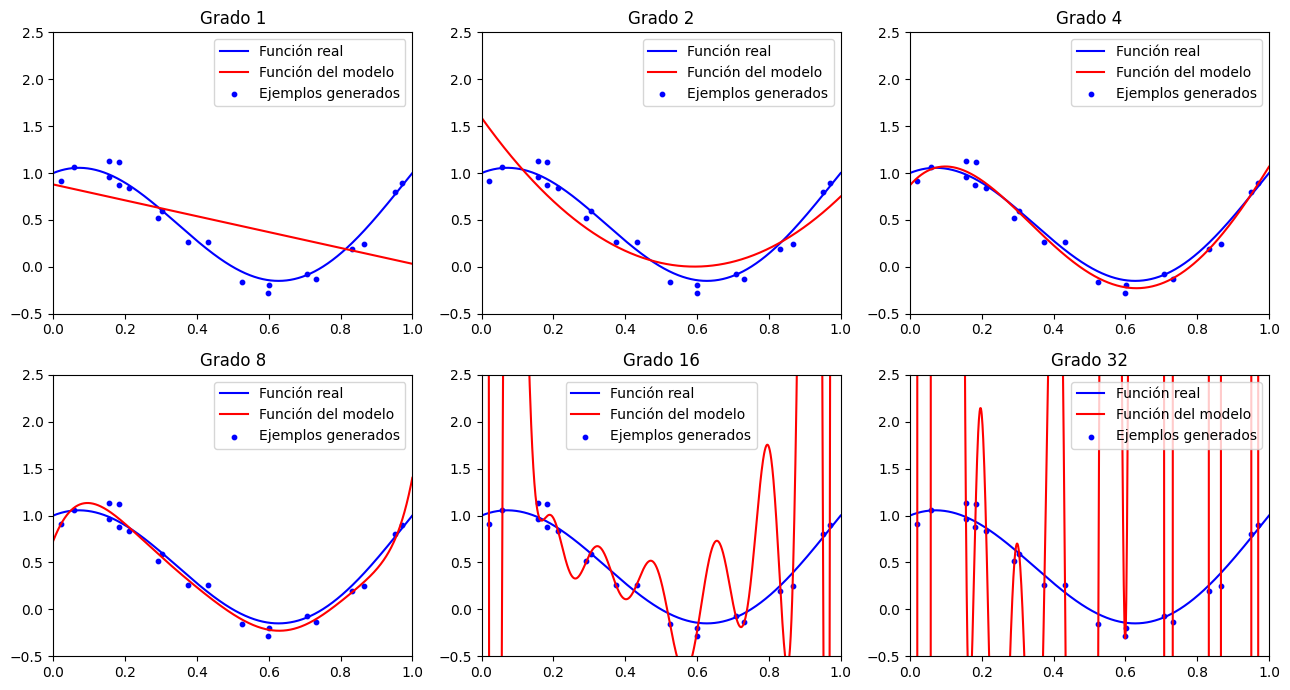

In [6]:
# Valores equiespaciados en [0,1]
num_val = 1000
x_val = np.linspace(0,1,num_val).reshape(-1, 1)

# Número de filas y columnas en las que quiero los subplots
num_rows = 2
num_cols = 3
# Creamos los subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(13, 7))

# Pintamos figura para cada grado
for i, degree in enumerate(degrees):
    pipeline = pipelines[degree]

    # Predicción de nuestro modelo
    y_predicted = pipeline.predict(x_val)

    # Pintamos las figuras, i // num_cols e i % num_cols son los indices de la fila/columna
    # La función ground truth en azul
    axes[i // num_cols, i % num_cols].plot(x_val, funcionReal(x_val), color='blue', label='Función real')

    # La función del modelo en rojo
    axes[i // num_cols, i % num_cols].plot(x_val, y_predicted, color='red', label='Función del modelo')

    # Los ejemplos X e y como puntos
    axes[i // num_cols, i % num_cols].scatter(X, y, color='blue', label='Ejemplos generados', s=10)

    # Título de la figura
    axes[i // num_cols, i % num_cols].set_title(f'Grado {degree}')

    # Leyenda
    axes[i // num_cols, i % num_cols].legend()

    # Intervalos de los ejes
    axes[i // num_cols, i % num_cols].axis([0, 1, -0.5, 2.5])

# Queda más bonito con subplots
plt.tight_layout()

plt.show()

7. Creamos la tabla usando `tabulate` que incluye el grado del polinomio en la primera fila ($header$ de la tabla), el número de pesos/coeficientes en la segunda, el $MSE$ (promedio y desviación típica) obtenido en entrenamiento en validación cruzada en la tercera fila, el $MSE$ (promedio y desviación típica) obtenido en test en validación cruzada en la cuarta fila, y el valor medio de los coeficientes aprendidos en valor absoluto con cada uno de los 6 modelos ajustados (incluyendo el $bias$ o $intercept$) en la última.

Como he usado `cross_validate`, puedo recuperar los resultados tanto de entrenamiento como de test con `cv_score['train_score']` y `cv_score['test_score']`. Con `pipeline.named_steps` puedo recuperar lo que me haga falta de los componentes del pipeline, como por ejemplo los coeficientes de la regresión lineal.

In [7]:
from tabulate import tabulate
table_data = []
# Cabecera de la tabla, como piden todo en filas, será la primera columna
headers = ["Grado", "Número de pesos", "MSE (Train)", "MSE (Test)", "Media de pesos (abs)"]
table_data.append(headers)

for degree in degrees:
    pipeline = pipelines[degree]
    # Extraemos los resultados precalculados anteriormente
    cv_score = cv_scores[degree]

    # Número de pesos
    num_coef = len(pipeline.named_steps['linearregression'].coef_)

    # MSE en entrenamiento y test, media y std, teniendo en cuenta que la media lleva un -1 ya que cross_validate usó MSE negativo
    mse_train_mean = -np.mean(cv_score['train_score'])
    mse_train_std = np.std(cv_score['train_score'])
    mse_test_mean = -np.mean(cv_score['test_score'])
    mse_test_std = np.std(cv_score['test_score'])

    # Media de pesos en valores absolutos
    coef = pipeline.named_steps['linearregression'].coef_
    bias = pipeline.named_steps['linearregression'].intercept_
    mean_coef = np.mean(np.abs(np.concatenate([[bias], coef])))

        # Añadimos los datos del grado actual a la tabla
    table_data.append([
        degree,
        num_coef,  # Total
        f"{mse_train_mean:.4f} ± {mse_train_std:.4f}",  # MSE (media y std) en entrenamiento
        f"{mse_test_mean:.4f} ± {mse_test_std:.4f}",  # MSE (media y std) en test
        f"{mean_coef:.4f}"  # Media de coeficientes en valor absoluto
    ])

# Trasponemos table_data ya que se nos pide todo en filas
table_data_transposed = list(map(list, zip(*table_data)))

# Generamos la tabla
table = tabulate(table_data_transposed, tablefmt="grid")

print(table)

+----------------------+-----------------+-----------------+-----------------+-----------------+---------------------------------+----------------------------------------------------+
| Grado                | 1               | 2               | 4               | 8               | 16                              | 32                                                 |
+----------------------+-----------------+-----------------+-----------------+-----------------+---------------------------------+----------------------------------------------------+
| Número de pesos      | 2               | 3               | 5               | 9               | 17                              | 33                                                 |
+----------------------+-----------------+-----------------+-----------------+-----------------+---------------------------------+----------------------------------------------------+
| MSE (Train)          | 0.1583 ± 0.0159 | 0.0512 ± 0.0077 | 0.0054 ± 0.0006 | 0

<font color='blue'> ¿Se observa algún patrón en los resultados obtenidos, así como en la magnitud de los coeficientes tras el entrenamiento? ¿Se observa algún fenómeno de infraentrenamiento ($underfitting$) o sobreentrenamiento ($overfitting$)? ¿Qué grado considera el más adecuado para resolver este problema? ¿Por qué?

Viendo las gráficas obtenidas, se ve claramente como tenemos $underfitting$ para grados 1 y 2, ya que el modelo es demasiado simple para aproximar la función real. Los datos de la tabla confirman eso, ya que podemos ver que el MSE de entrenamiento (y el de test también) es mayor para grados menores y va disminuyendo con el aumento del grado. Se ve que para grado 4 hay un cambio considerable, ya que tanto el MSE de entrenamiento como el de test llega al mínimo. Viendo la gráfica, se ve como el modelo aproxima bastante bien la función real. En cambio a partir de grado 8 se observa $overfitting$, ya que el MSE de entrenamiento sigue disminuyendo, pero aumenta el MSE de test: la función sobreajusta los datos de entrenamiento y no generaliza bien. Gráficamente esto se ve con que el modelo tiene una forma muy caótica al intentar acercarse a todos los datos del entrenamiento. En la tabla este fenómeno coincide con la explosión de las medias de pesos en valor absoluto.

En resumen, el grado 4 parece ser el mejor. Aunque hay que tener en cuenta que por la presencia de aleatoriedad, es posible que nos salga que el grado 8 sea mejor en algunos casos, pero preferimos tener algo de $underfitting$ antes que $overfitting$, así que prefiero el grado 4.

### <font color='blue'>Ejercicio 1.B: Clasificación en 2D (1 punto)</font>

<font color='blue'> En este ejercicio haremos algo similar a lo realizado en el anterior, pero ahora con un problema de clasificación y empleando un problema sintético en 2D. Haremos uso de dos funciones, que se incluyen a continuación:

<font color='blue'>$simula\_unif(N, dim, rango)$, que calcula una lista de $N$ vectores de dimensión $dim$. Cada vector contiene $dim$ números aleatorios uniformes en el intervalo $rango$.

<font color='blue'>$simula\_recta(intervalo)$, que simula de forma aleatoria los parámetros $v = (a, b)$ de una
recta, $y = ax + b$, dado un determinado intervalo (dentro del cual se generan dos puntos aleatorios, que se emplearán para calcular la pendiente y el término independiente de la recta).

In [8]:
def simula_unif(N, dim, rango):
	return np.random.uniform(rango[0],rango[1],(N,dim))

In [9]:
def simula_recta(intervalo):
    points = np.random.uniform(intervalo[0], intervalo[1], size=(2, 2))
    x1 = points[0,0]
    x2 = points[1,0]
    y1 = points[0,1]
    y2 = points[1,1]
    # y = a*x + b
    a = (y2-y1)/(x2-x1) # Cálculo de la pendiente.
    b = y1 - a*x1       # Cálculo del termino independiente.

    return a, b


<font color='blue'>Ahora, con ayuda de la función $simula\_unif()$, vamos a generar una muestra de 100 puntos 2D, en el intervalo $[-50, 50]$,  a los que vamos a añadir una etiqueta usando el signo de la función $f(x, y) = y - ax - b$ (es decir, el signo de la distancia de cada punto a la recta simulada con
$simula\_recta()$).




In [10]:
"""
np.sign(0) da 0 (véase https://numpy.org/doc/stable/reference/generated/numpy.sign.html), lo que, en ciertas ocasiones, puede ser problemático
Por ese motivo, proporcionamos esta sencilla función que devuelve el signo del valor que se le proporciona como entrada
Si esta función se emplea con un array, se obtendrá el error "ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()"
Si quiere emplearse con arrays, bastaría vectorizarla:
		numeros = np.random.randint(-10,10,10)
		sgn = np.vectorize(signo)
		print(numeros)
		print(sgn(numeros))
"""
def signo(x):
	if x >= 0:
		return 1
	return -1

def f(x, y, a, b):
	return signo(y - a*x - b)

In [11]:
intervalo = [-50,50]
[a, b] = simula_recta(intervalo)
new_points = simula_unif(100, 2, [-50,50])

y = []
for i in range(0,new_points.shape[0]):
    y.append(f(new_points[i][0], new_points[i][1], a, b))

y = np.array(y, np.float64)

<font color='blue'>A continuación, calculamos el error de clasificación de dicha recta ideal, y visualizamos el ajuste obtenido. Como es lógico, el error es 0% dado que lo único que estamos haciendo es mostrar los puntos etiquedatos con la recta que acabamos de crear.

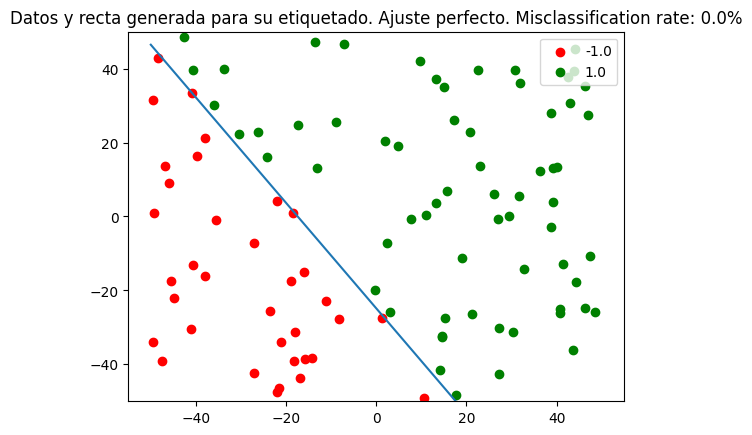

In [12]:
errors = []
for i in range(0,new_points.shape[0]):
    errors.append(f(new_points[i,0], new_points[i,1], a, b) != y[i])
MC_rate = 100*np.sum(errors)/new_points.shape[0]

# Dibujamos una gráfica donde los puntos muestren el resultado de su etiqueta, junto con la recta usada para ello
clases = np.unique(y)
X_class = [new_points[y==c_i] for c_i in clases]
colors=['red','green']
for i in range(len(clases)):
    plt.scatter(X_class[i][:, 0], X_class[i][:, 1], color=colors[i], label = clases[i])

# plt.scatter(new_points[:,0],new_points[:,1], c=y)
plt.legend(loc='upper right')
plt.plot([intervalo[0], intervalo[1]], [a*(intervalo[0])+b, a*(intervalo[1])+b])
plt.ylim((intervalo[0], intervalo[1]))
plt.title('Datos y recta generada para su etiquetado. Ajuste perfecto. Misclassification rate: {}%'.format(MC_rate))
plt.show()

<font color='blue'>Vamos a modificar de forma aleatoria un 5\% de las etiquetas positivas y otro 5\% de las negativas. Esta modificación de etiquetas está asociada con el ruido que siempre puede estar presenta en las etiquetas (sea por problemas en la transmisión de los datos, la precisión de los sistemas de medición, la incertidumbre ligada al proceso de adquisición y anotación de los datos, etc.) En esta ocasión, a pesar de que la recta empleada es la recta ideal (es decir, la propia función empleada para generar nuestra muestra original), habrá un cierto porcentaje de error asociado.  </font>

In [13]:
def introducir_ruido(y,porcent_ruido):
  # Identificamos las clases a partir de las etiquetas
  classes = np.unique(y)
  # Creamos una copia de las etiquetas, que será el array ruidoso que produciremos como salida
  y_noise = y.copy()
  # Ahora vamos recorriendo cada una de las clases
  for i in range(len(classes)):
    # Calculamos el número de ejemplos por clase a modificar
    numberPerClass = int(np.round(np.sum(y==classes[i])*porcent_ruido/100))
    # Recuperamos los índices de los ejemplos de cada clase y los desordenamos
    clase = np.where(y == classes[i])
    clase = np.random.permutation(clase[0])
    # Alteramos (introducimos ruido en) los índices correspondientes
    for i in clase[:numberPerClass]:
      y_noise[i] = y[i]*-1

  return y_noise

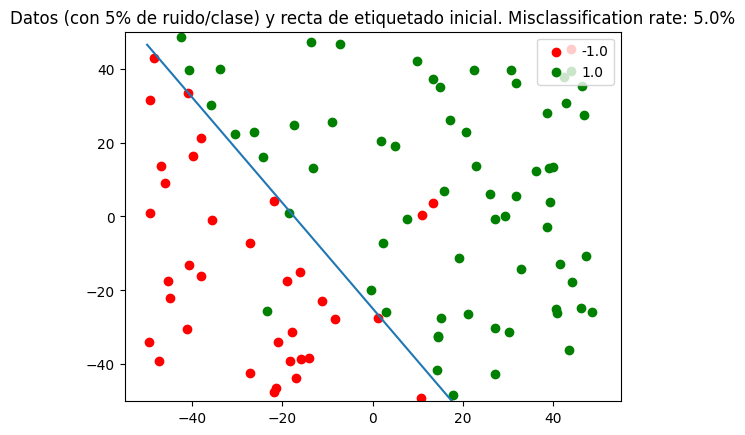

In [14]:
# Dibujar una gráfica donde los puntos muestren el resultado de su etiqueta,
# junto con la recta usada para ello
# Array con 10% de indices aleatorios para introducir ruido

porcentaje_ruido = 5
y_noise = introducir_ruido(y,porcentaje_ruido)

errors = []
for i in range(0,new_points.shape[0]):
    errors.append(f(new_points[i,0], new_points[i,1], a, b) != y_noise[i])
MC_rate = 100*np.sum(errors)/new_points.shape[0]

plt.figure()

clases = np.unique(y_noise)
X_class = [new_points[y_noise==c_i] for c_i in clases]
colors=['red','green']
for i in range(len(clases)):
    plt.scatter(X_class[i][:, 0], X_class[i][:, 1], color=colors[i], label = clases[i])

plt.legend(loc='upper right')
# plt.scatter(new_points[:,0],new_points[:,1], c=y_noise)
plt.plot([intervalo[0], intervalo[1]], [a*(intervalo[0])+b, a*(intervalo[1])+b])
plt.ylim((intervalo[0], intervalo[1]))
plt.title('Datos (con {}% de ruido/clase) y recta de etiquetado inicial. Misclassification rate: {}%'.format(porcentaje_ruido,MC_rate))
plt.show()



<font color='blue'>Ahora queremos entrenar un $\textit{Support Vector Machine}$
 (`sklearn.svm.SVC` con kernel lineal) con estos datos y mostrar $accuracy$ y $f1$-$score$, tanto en entrenamiento como test, así como las fronteras de decisión encontradas. Una frontera de decisión ($\textit{decision boundary}$) es la superficie/hiperplano que separa el espacio de entradas de modo que, en el contexto de un problema de clasificación binaria como el que nos ocupa, el clasificador etiquete todos los puntos de un lado de la frontera como pertenecientes a una clase y todos los del otro lado como pertenecientes a la otra.

 <font color='blue'>Vamos a repetir la operación anterior con distintas transformaciones (polinómicas) de los datos de entrada (grados $1, 2, 4$ y $8$). Queremos explorar cómo cambian estas fronteras de decisión a medida que incrementamos la complejidad de los modelos empleados.

 <font color='blue'> Más concretamente, tenemos que mostrar los siguientes resultados:
* <font color='blue'>Fronteras de decisión 2D sobre datos de entrenamiento para cada uno de los 4 ajustes (e incluyendo una línea que represente la frontera ideal, es decir, la correspondiente con la recta generadora de las etiquetas y que nos gustaría aproximar). Para esta visualización pueden resultar de utilidad las siguientes funciones: `contourf`, `ListedColormap` o `DecisionBoundaryDisplay`; y el siguiente script: https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html.
* <font color='blue'>Una tabla que incluya el grado de polinomio empleado (en la primera fila), el número de pesos ajustados (en la segunda fila), y los errores de entrenamiento y test con cada uno de los modelos ajustados ($accuracy$ y $f1$-$score$), en las filas tercera y cuarta de la tabla, respectivamente. De cara a evaluar el error de test, en este caso crearemos un conjunto de test diferenciado (con 100 ejemplos) siguiendo exactamente el mismo proceso empleado para el conjunto de entrenamiento. Este error de test se utilizará como estimación del error fuera de la muestra (lo que se conoce como $\textit{out-of-sample error}$).

<font color='blue'>Desde el punto de vista de entrenamiento del modelo, se recomienda emplear $SVC$ atendiendo a los siguientes aspectos: es importante escalar los datos antes de entrenar (`StandardScaler`); no nos interesa emplear regularización a la hora de entrenar el modelo (¿por qué?), motivo por el cual tendremos que escoger un valor elevado para el hiperparámetro $C$; tendremos que escoger un valor de iteraciones suficientemente alto como para permitir que el modelo entrene adecuadamente, pero suficientemente bajo como para que el entrenamiento no se eternice; y, finalmente, recordemos que el kernel a emplear es linear (¿cuál emplea SVC por defecto?).

<font color='blue'>El alumnado debe describir en detalle el trabajo realizado, las decisiones tomadas, así como las conclusiones extraídas a partir de los resultados obtenidos.

Primero creamos pipelines para cada grado, entrenando los `SVC` con kernel lineal, hiperparámetro $C$ a $1000$ para evitar regularización (cuanto menor sea $C$ más regularizado es, $1000$ se considera suficiente para no tener regularización), y número de iteraciones $200000$, bastante para que entrene bien y no tarde mucho. El kernel por defecto que tiene `SVC` es `RBF` (radial basis function), por eso tenemos que especificar el kernel como parámetro. `StandardScaler` escala los datos, transformándolos.

No empleamos regularización porque la idea del problema es ver como cambia la frontera de decisión a medida que incrementamos la complejidad. Al regularizar no se vería tan bien.

In [15]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler
degrees = [1, 2, 4, 8] # Grados
# Diccionario con pipelines
pipelines = {}

#Recorro los grados
for degree in degrees:
  # Creamos pipeline con las características, escalado y svc
  pipeline = make_pipeline(
      PolynomialFeatures(degree),
      StandardScaler(),
      SVC(kernel='linear', C=1000, max_iter=200_000, random_state=42)
  )
  pipeline.fit(new_points, y_noise)
  pipelines[degree] = pipeline


Pintamos frontera de decisión para cada grado, junto con la recta original. Adapto el código del enlace del enunciado. `DecisionBoundary` pinta la frontera de decisión para el pipeline y los puntos dados.

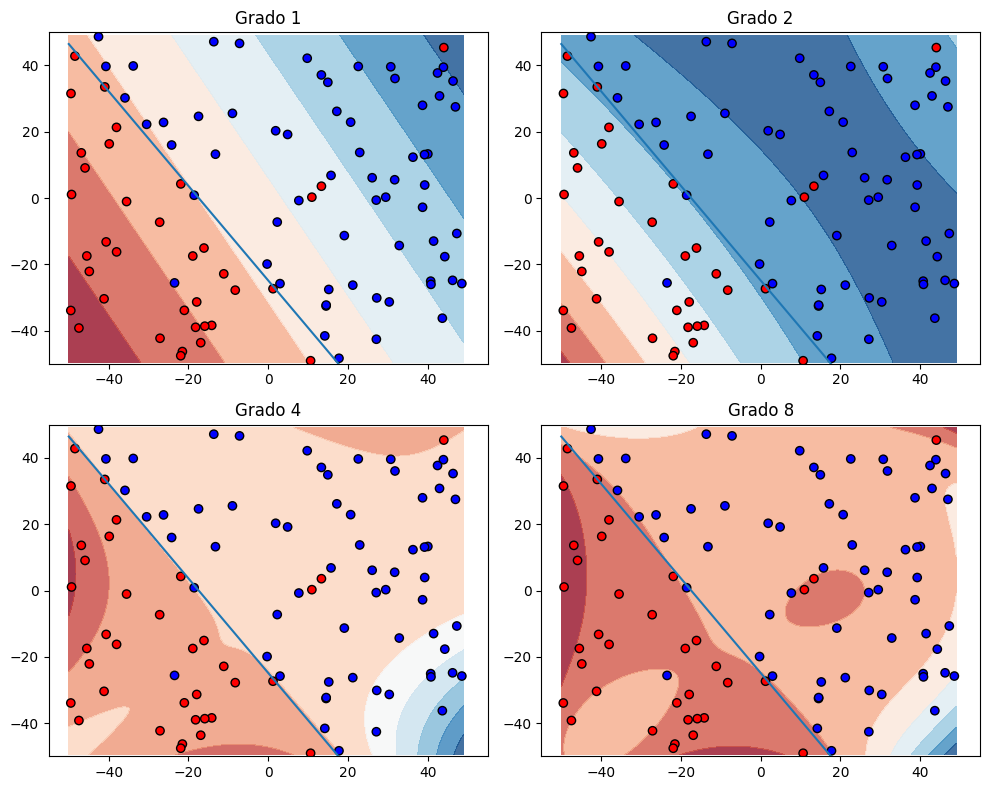

In [16]:
from sklearn.inspection import DecisionBoundaryDisplay
from matplotlib.colors import ListedColormap


figure = plt.figure(figsize=(10, 8))
num_cols = 2
cm = plt.cm.RdBu
cm_bright = ListedColormap(["#FF0000", "#0000FF"])

for i, degree in enumerate(degrees):
  ax = plt.subplot(num_rows, num_cols, i+1)

  pipeline = pipelines[degree]

  DecisionBoundaryDisplay.from_estimator(
      pipeline, new_points, cmap=cm, alpha=0.8, ax=ax, eps=0.5
  )
  # Plot the training points
  ax.scatter(new_points[:, 0], new_points[:, 1], c=y_noise, cmap=cm_bright, edgecolors="k")
  ax.plot([intervalo[0], intervalo[1]], [a*(intervalo[0])+b, a*(intervalo[1])+b])
  ax.set_ylim((intervalo[0], intervalo[1]))
  ax.set_title(f'Grado {degree}')

plt.tight_layout()
plt.show()

Creamos conjunto de test y visualizamos para ver que es parecido al conjunto de entrenamiento.

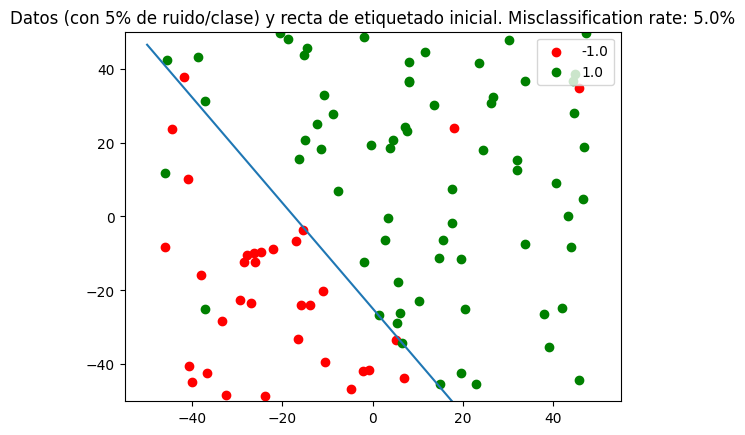

In [17]:
# Puntos de test 2D
test_points = simula_unif(100, 2, [-50,50])

# Etiquetas
y_test = []
for i in range(0,test_points.shape[0]):
    y_test.append(f(test_points[i][0], test_points[i][1], a, b))

y_test = np.array(y_test, np.float64)

# Etiquetas con ruido
porcentaje_ruido = 5
y_test_noise = introducir_ruido(y_test,porcentaje_ruido)

# Error
errors = []
for i in range(0,test_points.shape[0]):
    errors.append(f(test_points[i,0], test_points[i,1], a, b) != y_test_noise[i])
MC_rate = 100*np.sum(errors)/test_points.shape[0]

# Visualizamos
plt.figure()

clases = np.unique(y_test_noise)
X_class = [test_points[y_test_noise==c_i] for c_i in clases]
colors=['red','green']
for i in range(len(clases)):
    plt.scatter(X_class[i][:, 0], X_class[i][:, 1], color=colors[i], label = clases[i])

plt.legend(loc='upper right')
# plt.scatter(new_points[:,0],new_points[:,1], c=y_noise)
plt.plot([intervalo[0], intervalo[1]], [a*(intervalo[0])+b, a*(intervalo[1])+b])
plt.ylim((intervalo[0], intervalo[1]))
plt.title('Datos (con {}% de ruido/clase) y recta de etiquetado inicial. Misclassification rate: {}%'.format(porcentaje_ruido,MC_rate))
plt.show()

Obtenemos tabla. Usamos `accuracy_score` y `f1_score` de `sklearn` para medir el rendimiento. Reciben como parámetros las etiquetas verdaderas y las predecidas. `accuracy` calcula la proporción de etiquetas correctamente predecidas, mientras que `f1_score` es mayor cuanto mayor sean tanto precision como recall, penalizando que uno de ellos sea muy pequeño.  

In [18]:
table_data = []
# Cabecera de la tabla, como piden todo en filas, será la primera columna
headers = ["Grado", "Número de pesos", "Error (Train, Accuracy y f1-score)", "Error (Test, Accuracy y f1-score)"]
table_data.append(headers)

# Recorremos grados
for degree in degrees:
    pipeline = pipelines[degree]

    # Predecimos
    y_pred_train = pipeline.predict(new_points)
    y_pred_test = pipeline.predict(test_points)

    # Accuracy y f1-score
    acc_train = accuracy_score(y_noise, y_pred_train)
    acc_test = accuracy_score(y_test_noise, y_pred_test)
    f1_train = f1_score(y_noise, y_pred_train)
    f1_test = f1_score(y_test_noise, y_pred_test)

    # Número de pesos
    num_coef = pipeline.named_steps['svc'].coef_.shape[1]

        # Añadimos los datos del grado actual a la tabla
    table_data.append([
        degree,
        num_coef,  # Total coeficientes
        f"{acc_train:.3f}/{f1_train:.3f}",
        f"{acc_test:.3f}/{f1_test:.3f}"
    ])

# Trasponemos table_data ya que se nos pide todo en filas
table_data_transposed = list(map(list, zip(*table_data)))

# Generamos la tabla
table = tabulate(table_data_transposed, tablefmt="grid")

print(table)

+------------------------------------+-------------+-------------+-------------+-------------+
| Grado                              | 1           | 2           | 4           | 8           |
+------------------------------------+-------------+-------------+-------------+-------------+
| Número de pesos                    | 3           | 6           | 15          | 45          |
+------------------------------------+-------------+-------------+-------------+-------------+
| Error (Train, Accuracy y f1-score) | 0.900/0.922 | 0.920/0.940 | 0.970/0.977 | 1.000/1.000 |
+------------------------------------+-------------+-------------+-------------+-------------+
| Error (Test, Accuracy y f1-score)  | 0.910/0.933 | 0.920/0.941 | 0.880/0.909 | 0.830/0.872 |
+------------------------------------+-------------+-------------+-------------+-------------+


Finalmente, podemos llegar a la conclusión de que SVC con grado 1 es el mejor, como es esperado (los datos originales son linealmente separables). A partir de grado 2 se observa overfitting, ya que el accuracy y f1-score aumentan para el entrenamiento pero decrecen para el test. De hecho en la gráfica del grado 4 se ve muy bien como SVC separa outliers en pequeñas islas separadas del resto de datos.
Cabe resaltar que por aleatoriedad algunas veces el grado 2 será mejor, lo cual tiene sentido, ya que en el entorno de grado 1 por aleatoriedad puede suceder eso.



---



## <font color='blue'>Ejercicio 2: PROBLEMA DE CLASIFICACIÓN (4 puntos) </font>

<font color='blue'> En este ejercicio los alumnos se enfrentarán a un problema de clasificación, que tendrán que abordar de comienzo a fin (desde el análisis exploratorio hasta el entrenamiento y validación de los modelos de aprendizaje automático seleccionados). Más concretamente, se enfrentarán al problema de $\textit{Optical Recognition of Handwritten Digits}$ (https://archive.ics.uci.edu/dataset/80/optical+recognition+of+handwritten+digits). Este conjunto de datos contiene información sobre distintos dígitos manuscritos: cada fila contiene 64 valores enteros (en el rango $[0, 16]$) y un valor entero
(que se encuentra en el rango $[0, 9]$) que se corresponde con el dígito manuscrito a clasificar. En total hay 64 características/$features$ y 5620 ejemplos/instancias. El alumnado debe realizar, al menos, las siguientes tareas (que deben ser descritas y abordadas, explícitamente, en la documentación entregada; de hecho, se debe incluir un subapartado en el Notebook para cada una de ellas):
1. <font color='blue'> Análisis descriptivo del problema y análisis exploratorio de los datos a nuestra disposición.
2. Preprocesado de datos (selección/extracción de características, reducción de dimensionalidad, procesado de datos extremos/atípicos, imputación de datos faltantes, escalado de variables, codificación/transformación de datos, desbalanceo de datos).
3. Definición del protocolo de validación experimental (entrenamiento, validación y test), junto con las métricas de evaluación del rendimiento que corresponda.
4. Selección de, al menos, 3 modelos de aprendizaje automático a emplear en la resolución del problema, de los cuales 1 por lo menos debe ser un $ensemble$.
5. Selección y estimación de valores para hiperparámetros (incluyendo el tipo de regularización a usar).
6. Entrenamiento y estimación del error fuera de la muestra. Discusión de resultados y extracción de conclusiones.





In [19]:
#Para acceder a nuestros ficheros de Google Drive
from google.colab import drive
drive.mount('/content/drive')
# La carpeta 'clasificacion' (que contiene optdigits.tes, optdigits.tra, optdigits.names)
# debe estar en vuestro Drive, dentro de la carpeta 'Colab Notebooks'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###  <font color='blue'> 1. Análisis descriptivo del problema y análisis exploratorio de los datos a nuestra disposición.

Primero vamos a enunciar cómo es el dataset con el que estamos trabajando. El dataset es parecido al famoso MNIST, corresponde a imágenes de dígitos que han sido simplificadas. Según la página web del dataset, los datos originalmente eran bitmaps de $32$x$32$, que fueron divididos en celdas $4$x$4$ disjuntas y en cada una de ellas se ha contado el número de pixels negros. De allí se ha obtenido el dataset, de forma que los bitmaps originales se han reducido a matrices $8$x$8$ donde cada elemento es el número de pixels negros en la celda a la que corresponde. Luego tenemos 64 atributos, cada uno en un rango $[0,16]$, y las etiquetas en un rango $[0,9]$. Esta simplificación reduce la dimensionalidad considerablemente y hace que pequeñas distorsiones no afecten mucho al resultado.

Es importante resaltar que según la descripción, no tenemos datos perdidos, y en general la fuente es fiable. Podemos suponer que no hay ruido, en particular outliers o ruido estocástico si suponemos que los datos fueron recogidos bien, es decir que el proceso de digitalización de los dígitos manuscritos se hizo lo mejor posible. Esto simplificará mucho la parte de preprocesado.

Dicho esto, el objetivo del problema es entrenar un modelo que reciba una imagen de un dígito en el formato descrito anteriormente y que nos devuelva la clase a la que pertenece, es decir, qué dígito es. El problema es claramente un problema de clasificación.


Primero subimos los datos y vemos como son. Tenemos cuidado con no tocar el conjunto de test para evitar data snooping. He decidido trabajar con arrays de NumPy en este problema en vez de DataFrames de pandas ya que los datasets de imagenes van mejor con arrays que con dataframes.

In [20]:
dataFolder = 'drive/MyDrive/Colab Notebooks/clasificacion/'
train_file = 'optdigits.tra'
test_file = 'optdigits.tes'
# Subimos el dataset de entrenamiento y test
train_data = np.loadtxt(dataFolder + train_file, delimiter=',')
test_data = np.loadtxt(dataFolder + test_file, delimiter=',')

print(f"Dimensiones entrenamiento: {train_data.shape}")
print(f"Dimensiones test: {test_data.shape}")
print("2 ejemplos de entrenamiento, atributos:\n")
print(train_data[:2, :-1])
print("Etiquetas\n")
print(train_data[:2, -1])

Dimensiones entrenamiento: (3823, 65)
Dimensiones test: (1797, 65)
2 ejemplos de entrenamiento, atributos:

[[ 0.  1.  6. 15. 12.  1.  0.  0.  0.  7. 16.  6.  6. 10.  0.  0.  0.  8.
  16.  2.  0. 11.  2.  0.  0.  5. 16.  3.  0.  5.  7.  0.  0.  7. 13.  3.
   0.  8.  7.  0.  0.  4. 12.  0.  1. 13.  5.  0.  0.  0. 14.  9. 15.  9.
   0.  0.  0.  0.  6. 14.  7.  1.  0.  0.]
 [ 0.  0. 10. 16.  6.  0.  0.  0.  0.  7. 16.  8. 16.  5.  0.  0.  0. 11.
  16.  0.  6. 14.  3.  0.  0. 12. 12.  0.  0. 11. 11.  0.  0. 12. 12.  0.
   0.  8. 12.  0.  0.  7. 15.  1.  0. 13. 11.  0.  0.  0. 16.  8. 10. 15.
   3.  0.  0.  0. 10. 16. 15.  3.  0.  0.]]
Etiquetas

[0. 0.]


Efectivamente, lo que vemos concuerda con la descripción del dataset. Vamos a extraer los atributos y las etiquetas.

In [21]:
# Extraemos atributos y etiquetas
X_train = train_data[:, :-1]  # Atributos
y_train = train_data[:, -1]   # Etiquetas
X_test = test_data[:, :-1]
y_test = test_data[:, -1]

print("Dimensiones de los atributos de entrenamiento:", X_train.shape)
print("Dimensiones de los atributos de test:", X_test.shape)
print("Tipo de dato de los atributos:", X_train.dtype)
print("Tipo de dato de las etiquetas:", y_train.dtype)
print(X_train)
print(y_train)

Dimensiones de los atributos de entrenamiento: (3823, 64)
Dimensiones de los atributos de test: (1797, 64)
Tipo de dato de los atributos: float64
Tipo de dato de las etiquetas: float64
[[ 0.  1.  6. ...  1.  0.  0.]
 [ 0.  0. 10. ...  3.  0.  0.]
 [ 0.  0.  8. ...  0.  0.  0.]
 ...
 [ 0.  0.  3. ...  9.  0.  0.]
 [ 0.  0.  6. ... 16.  5.  0.]
 [ 0.  0.  2. ...  0.  0.  0.]]
[0. 0. 7. ... 6. 6. 7.]


Ahora que lo tenemos todo separado, vamos a visualizar los datos teniendo en cuenta su descripción. La función que hemos definido nos servirá en el futuro para visualizar ejemplos, ya que es muy difícil comprender los atributos numéricamente.

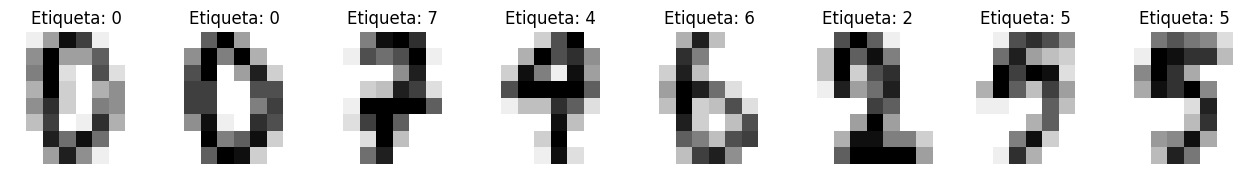

In [22]:
# Función para visualizar ejemplos, recibe los atributos, etiquetas y el número de ejemplos a visualizar
def plot_digits(images, labels, num=8):
  # Visualizamos en una fila
  fig, axes = plt.subplots(1, num, figsize=(16, 4))
  for i in range(num):
    # Redimensionamos a matriz 8x8
    axes[i].imshow(images[i].reshape(8, 8), cmap='binary')
    axes[i].set_title("Etiqueta: {}".format(int(labels[i])))
    axes[i].axis('off')

# Visualizamos algunos ejemplos de entrenamiento
plot_digits(X_train, y_train)
plt.show()

Visualmente parece que las etiquetas corresponden a las imágenes. Ahora procedemos a estudiar el porcentaje de cada clase en el conjunto de entrenamiento. Según la página web, los datos están balanceados en el conjunto de entrenamiento y test. Vamos a pintar histogramas para comprobarlo, tanto para el conjunto de entrenamiento como test. Esta visualización no se consideraría data snooping, simplemente estamos comprobando que el conjunto de test está balanceado.

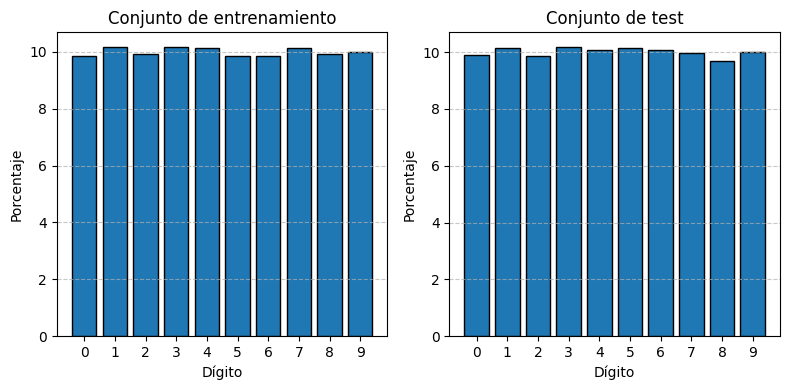

In [23]:
# Porcentajes de ocurrencias
train_counts, _ = np.histogram(y_train, bins=range(11))
test_counts, _ = np.histogram(y_test, bins=range(11))

train_percentages = train_counts / len(y_train) * 100
test_percentages = test_counts / len(y_test) * 100

# Subplot con 1 fila y 2 columnas por comodidad
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# Conjunto entrenamiento
axes[0].bar(range(10), train_percentages, edgecolor='black')
axes[0].set_xlabel('Dígito')
axes[0].set_ylabel('Porcentaje')
axes[0].set_title('Conjunto de entrenamiento')
axes[0].set_xticks(range(10))
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Conjunto test
axes[1].bar(range(10), test_percentages, edgecolor='black')
axes[1].set_xlabel('Dígito')
axes[1].set_ylabel('Porcentaje')
axes[1].set_title('Conjunto de test')
axes[1].set_xticks(range(10))
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

En efecto, los datos están balanceados, tenemos alrededor de 10% por clase. Ahora vamos a comprobar que efectivamente no tenemos datos perdidos o anormales en el dataset (conjunto de entrenamiento y test).

In [24]:
# Datos perdidos (no números) y anormales (fuera del rango)
missing_values = np.isnan(X_train).any() or np.isnan(X_test).any()
abnormal_values = np.any(X_train < 0) or np.any(X_train > 16) or np.any(X_test < 0) or np.any(X_test > 16)

print("\nDatos perdidos:", missing_values)
print("Datos anormales:", abnormal_values)


Datos perdidos: False
Datos anormales: False


Ahora quiero las medias, desviaciones típicas, máximos y mínimos para cada atributo. Como numéricamente estos datos serán dificiles de comprender, los visualizo con mapas de calor.

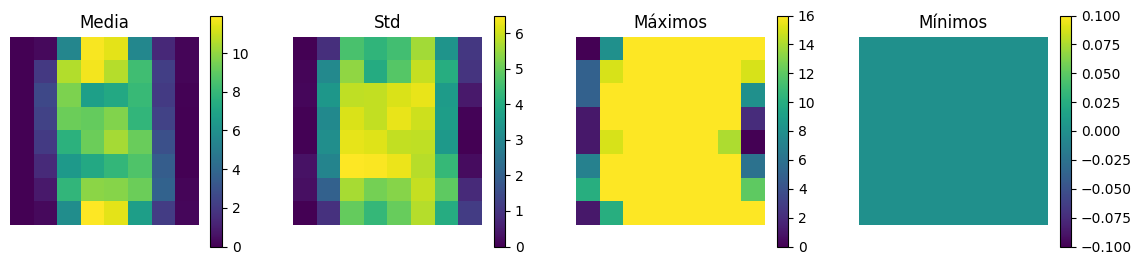

In [25]:
# Calculamos
mean_values = np.mean(X_train, axis=0)
std_values = np.std(X_train, axis=0)
max_values = np.max(X_train, axis=0)
min_values = np.min(X_train, axis=0)

# Redimensionamos
mean_matrix = mean_values.reshape(8, 8)
std_matrix = std_values.reshape(8, 8)
max_matrix = max_values.reshape(8, 8)
min_matrix = min_values.reshape(8, 8)

# Creamos subplots, dos filas y dos columnas
fig, axes = plt.subplots(1, 4, figsize=(14, 3))

# Medias
mean_img = axes[0].imshow(mean_matrix, cmap='viridis')
axes[0].set_title('Media')
axes[0].axis('off')
fig.colorbar(mean_img, ax=axes[0], orientation='vertical')

# Desviaciones típicas
std_img = axes[1].imshow(std_matrix, cmap='viridis')
axes[1].set_title('Std')
axes[1].axis('off')
fig.colorbar(std_img, ax=axes[1], orientation='vertical')

# Máximos
max_img = axes[2].imshow(max_matrix, cmap='viridis')
axes[2].set_title('Máximos')
axes[2].axis('off')
fig.colorbar(max_img, ax=axes[2], orientation='vertical')

# Mínimos
min_img = axes[3].imshow(min_matrix, cmap='viridis')
axes[3].set_title('Mínimos')
axes[3].axis('off')
fig.colorbar(min_img, ax=axes[3], orientation='vertical')

plt.show()

La media nos da la idea de que los datos tienden a centrarse en la imagen, muy a menudo trazando un 8, que es debido a que muchos números tienden a pasar por la misma zona al escribirse. Es natural que las dos columnas en los extremos tienen una media muy baja, prácticamente 0, ya que cuando nosotros escribimos dígitos suelen ser más altos que anchos. En la desviación típica se observa algo similar, hay gran variabilidad en el centro, además de que en los extremos hay zonas donde hay algo de variabilidad. Los mínimos son fáciles de interpetar, en todos los atributos hay ejemplos donde están a 0, mientras que los máximos nos dicen que en el centro, como es esperable, están muy cerca de 16 los máximos de los atributos, y que en las dos columnas de los extremos también hay valores elevados, lo cual se puede interpretar como que al escribir los dígitos algunos tuercen el dígito, o se desvían del centro. En particular se observa una tendencia de desviarse a las esquinas inferior y superior derechas.

Todas estas observaciones nos permiten pensar que a lo mejor reducir dimensionalidad acotando la imagen tiene sentido. En particular, podríamos librarnos de las primera y/o última columna, o reducir dimensionalidad con técnicas como `PCA`(Principal Component Analysis).

Ahora quiero ver como se distribuyen los valores de los atributos en el conjunto de entrenamiento, es decir, para los posibles valores de los atributos que tienen el mismo rango, cual es su frecuencia.

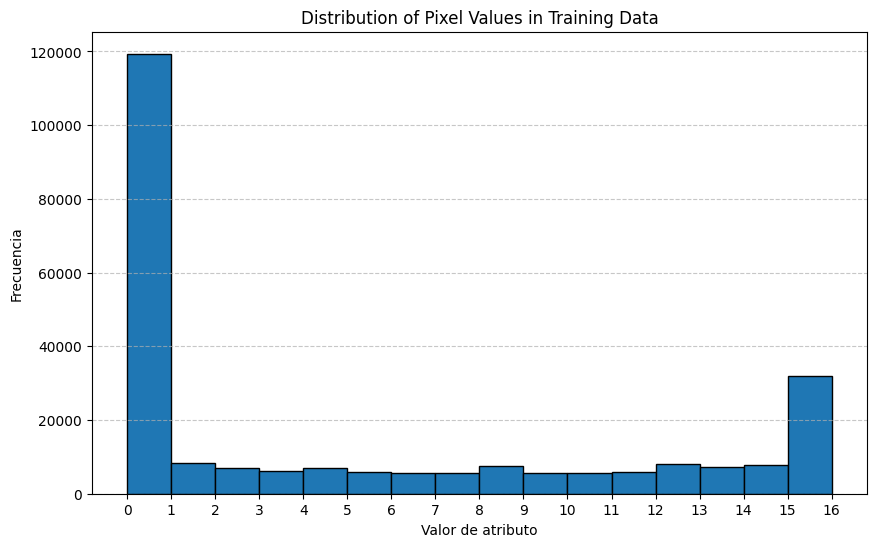

In [26]:
# Distribuciones de valores en atributos
plt.figure(figsize=(10, 6))
plt.hist(X_train.flatten(), bins=range(17), edgecolor='black')
plt.xlabel('Valor de atributo')
plt.ylabel('Frecuencia')
plt.title('Distribution of Pixel Values in Training Data')
plt.xticks(range(17))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Podemos concluir que gran parte de la imagen no está pintada, lo cual tiene sentido. Los valores máximos son el segundo grupo más frecuente, se puede interpretar como que hay zonas en las que llega a acumularse mucha tinta al escribir el dígito. Todos los demás valores parece que están uniformemente distribuidos.  

Y por último, vamos a estudiar las correlaciones de las variables. Evito atributos con varianza 0 para no dividir por 0 al calcular la matriz.

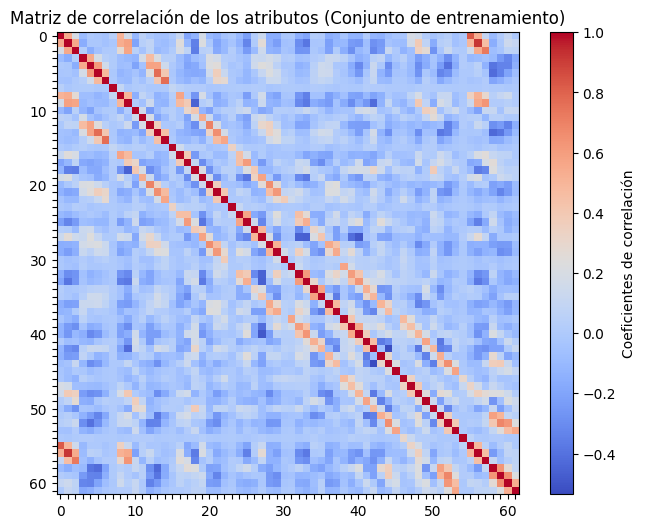

In [27]:
# Quitamos atributos con varianza 0
non_zero_var_indices = np.std(X_train, axis=0) != 0
X_train_non_zero_var = X_train[:, non_zero_var_indices]

# Matriz de correlación
corr_matrix_train = np.corrcoef(X_train_non_zero_var.T)

# Mapa de calor
plt.figure(figsize=(8, 6))
plt.imshow(corr_matrix_train, cmap='coolwarm')
plt.colorbar(label='Coeficientes de correlación')
plt.title('Matriz de correlación de los atributos (Conjunto de entrenamiento)')
# Añadir más marcas en el eje x e y sin etiquetas
ticks = np.arange(0, corr_matrix_train.shape[0])
tick_labels = [str(tick) if tick % 10 == 0 else None for tick in ticks]
plt.xticks(ticks, labels=tick_labels)
plt.yticks(ticks, labels=tick_labels)
plt.show()

Observamos un fenómeno curioso. Como la matriz es simétrica, fijemonos en la mitad por debajo de la matriz principal (que está al máximo ya que los atributos están correlacionados consigo mismos). Lo interesante es que observamos diagonales secundarias en paralelo a la principal, mientras que lo demás está poco correlacionado, con islas de correlación negativa. Se puede interpretar como que hay cierta simetría en los dígitos, como 1, 6, 8, 9, 0 mientras que hay zonas donde normalmente la presencia de tinta indica que al otro lado no se escribirá.

###  <font color='blue'> 2. Preprocesado de datos (selección/extracción de características, reducción de dimensionalidad, procesado de datos extremos/atípicos, imputación de datos faltantes, escalado de variables, codificación/transformación de datos, desbalanceo de datos).

Como los datos están balanceados, no hacemos desbalanceo. Como todo los atributos son numéricos, no hacemos codificación. No faltan datos luego no hacemos imputación, no vamos a procesar datos atípicos ya que no estoy seguro de lo que serían en este contexto. Lo que vamos a hacer es preprocesar con un `StandardScaler`, que evitará que los outliers nos afecten mucho, normalizará los datos y ayudará a la convergencia de algoritmos de aprendizaje automático tales como `SVM` y redes neuronales. También reduciremos dimensionalidad con `PCA` (Principal Component Analysis). El análisis exploratorio previo sugiere que reduzcamos dimensionalidad ya que hay atributos que no influyen mucho. Para agilizar el entrenamiento de los modelos, reduciré dimensionalidad manteniendo el 95% de la varianza explicada, que es un valor muy usado para `PCA` ya que solo perdemos 5% de varianza que no es mucho y podríamos decir que no perdemos mucha información.

Luego a `PCA` le pongo `num_components=95`, de forma que mantendrá el 95% de la varianza. Aplicamos `fit_transform` al conjunto de entrenamiento y vemos cómo ha quedado.

In [28]:
from sklearn.decomposition import PCA

# Mi pipeline de preprocesamiento
preprocessing = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.95))
])
X_train_prepped = preprocessing.fit_transform(X_train)
print(f"Dimensiones de entrenamiento antes de preprocesar: {X_train.shape}")
print(f"Después: {X_train_prepped.shape}")

Dimensiones de entrenamiento antes de preprocesar: (3823, 64)
Después: (3823, 41)


Hemos conseguido reducir la dimensionalidad a dos tercios, mucho mejor. Para entender mejor con qué nos hemos quedado, voy a recuperar el conjunto de entrenamiento usando `inverse_transform` sobre el conjunto preprocesado. Habrá un error de reconstrucción debido al 5% de varianza que hemos perdido pero no debería ser muy distinto del conjunto original.

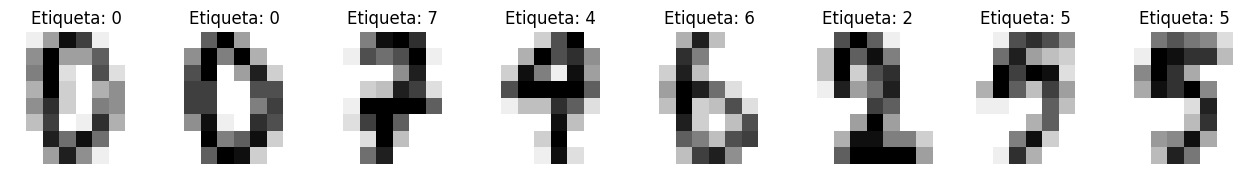

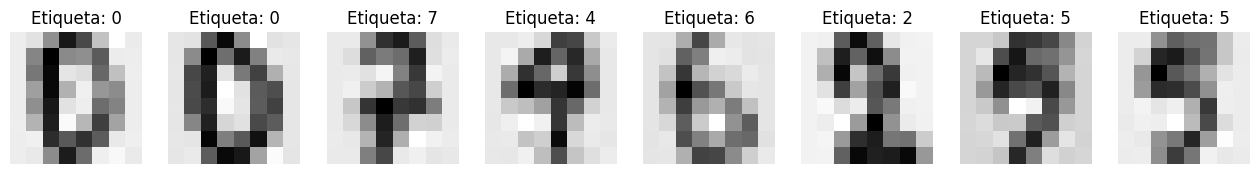

In [29]:
X_train_recovered = preprocessing.inverse_transform(X_train_prepped[:8, :])
plot_digits(X_train, y_train)
plot_digits(X_train_recovered, y_train)

Efectivamente, observamos como se parece mucho al conjunto original. Se nota que hay atributos que se han fusionado con otros, sobre todo se nota en las columnas primera y última, ya que tienen un mismo color grisáceo.

###  <font color='blue'> 3. Definición del protocolo de validación experimental (entrenamiento, validación y test), junto con las métricas de evaluación del rendimiento que corresponda.

Para medir el rendimiento usaré $accuracy$. Me decanto por esta medida ya que el dataset se supone que está muy balanceado (lo comprobaré más adelante) y es una medida muy fácil de entender (simplemente la proporción de aciertos). Aunque esta sea la medida principal de rendimiento, usaré como medidas adicionales $Confusion Matrix$, que me ayudará mucho visualizar cuales son los errores más comunes que empeoran el rendimiento de mi modelo.

Ahora, como tenemos $5620$ ejemplos, es algo subjetivo decidir si es mejor hacer `k-fold` o separar los ejemplos en conjunto de entrenamiento y de test, como hemos hecho hasta ahora. Como el problema que tenemos tampoco es tan complejo, voy a mantener la separación, emplear `CV` en el conjunto de entrenamiento y usar la estimación para el conjunto de test como estimación de la capacidad de generalización del modelo final.

###  <font color='blue'> 4. Selección de, al menos, 3 modelos de aprendizaje automático a emplear en la resolución del problema, de los cuales 1 por lo menos debe ser un $ensemble$.


Tal y como sugiere el libro "Hands-on Machine Learning" en el apéndice A (Machine Learning Checklist), voy a entrenar varios modelos con hiperparámetros estándares, en particular los pondré por defecto. Después usaré `5-fold cross validation` para medir su rendimiento y analizaré sus errores.

Empezaré con un `SVC`. Se considera un buen algoritmo para datasets no muy grandes, como este, y en general es muy apropiado para clasificación de imagenes no muy complicadas, como los dígitos que tenemos. Por defecto tiene kernel `rbf`, que se basa en el método de características de similitud. Este método ayuda capturar relaciones no lineales o patrones complejos en los datos.

In [30]:
svm_clf = make_pipeline(preprocessing, SVC(random_state=42))
svm_clf.fit(X_train, y_train)
# Obtenemos los hiperparámetros del modelo SVC del pipeline
# El último paso del pipeline es el clasificador SVC, por lo que accedemos a él con el índice [-1]
svc_params = svm_clf[-1].get_params()

# Imprimimos los hiperparámetros del clasificador SVC
print("Hiperparámetros del clasificador SVC:")
for param_name, param_value in svc_params.items():
    print(f"{param_name}: {param_value}")

Hiperparámetros del clasificador SVC:
C: 1.0
break_ties: False
cache_size: 200
class_weight: None
coef0: 0.0
decision_function_shape: ovr
degree: 3
gamma: scale
kernel: rbf
max_iter: -1
probability: False
random_state: 42
shrinking: True
tol: 0.001
verbose: False


Los hiperparámetros a tener en cuenta aquí son $C$, $gamma$, y el $kernel$. Como podemos ver efectivamente el kernel por defecto es el `rbf`, $C$ y $gamma$ se usan para regularizar, a menor valor mayor regularización. Cuando $C$ es mayor, el `SVC` le da prioridad a la reducción del error, haciendo que "la calle" que divide las clases sea más estrecha, luego reduce regularización e incrementa la probabilidad de sobreajustar. Cuando $gamma$ es mayor, la frontera de decisión se adapta mejor a los ejemplos del conjunto de entrenamiento, igualmente incrementando el sobreajuste.

Vamos a medir el rendimiento del modelo. Calculamos las medias y std de los resultados de validación cruzada. También calcularemos las predicciones en cada fold, nos hará falta después.

In [31]:
from sklearn.model_selection import cross_val_predict
# Realizo 5-fold cross validation utilizando accuracy como métrica
scores = cross_val_score(svm_clf, X_train, y_train, cv=5, scoring='accuracy')
fold_pred = cross_val_predict(svm_clf, X_train, y_train, cv=5)

# Calculo la media y la desviación estándar
mean_accuracy = scores.mean()
std_accuracy = scores.std()

print("Accuracy media:", mean_accuracy)
print("Std de accuracy:", std_accuracy)

Accuracy media: 0.9811686000752833
Std de accuracy: 0.005877698744326031


Una media de accuracy del 98,1%, ¡bastante bien! Vamos a ver como predice. Visualizo las predicciones para varios ejemplos del conjunto de entrenamiento. En la primera fila tenemos los ejemplos con las etiquetas verdaderas, y en la segunda con las predecidas.

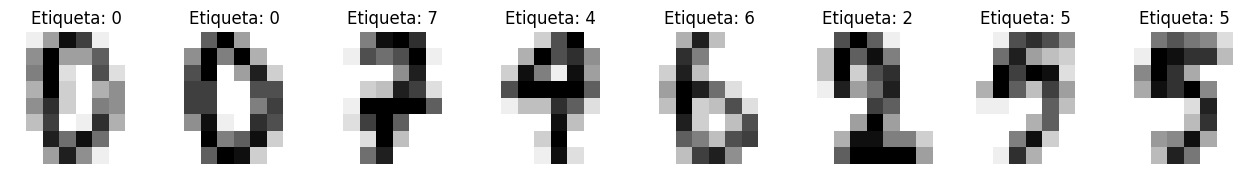

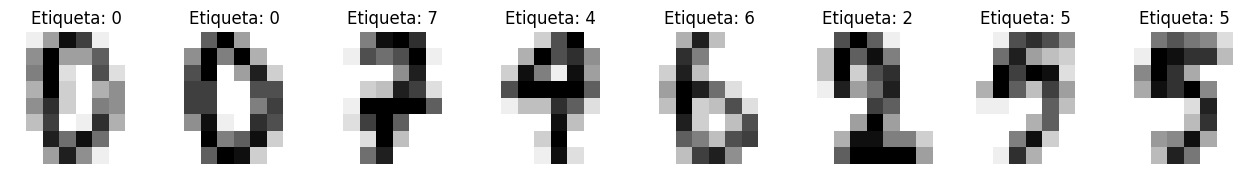

In [32]:
y_pred = svm_clf.predict(X_train[:8, :])
plot_digits(X_train, y_train)
plot_digits(X_train, y_pred)

¡Parece que va bien!. Vamos a analizar los errores. Voy a tomar prestado el código de los Notebooks de Aurélien Géron, el autor de "Hands-on...". De izquierda a derecha y de primera fila a la segunda tenemos:
1. Matriz de confusión tal cual.
2. Matriz normalizada por filas, es decir dividimos cada valor por el total de imagenes en la clase "verdadera" y lo ponemos en por cientos.
3. Matriz en la que ponemos a 0 los pesos de las predicciones correctas y normalizamos por filas. Así destacan mucho mejor los errores.
4. Mismo que la matriz anterior, pero normalizada por columas.

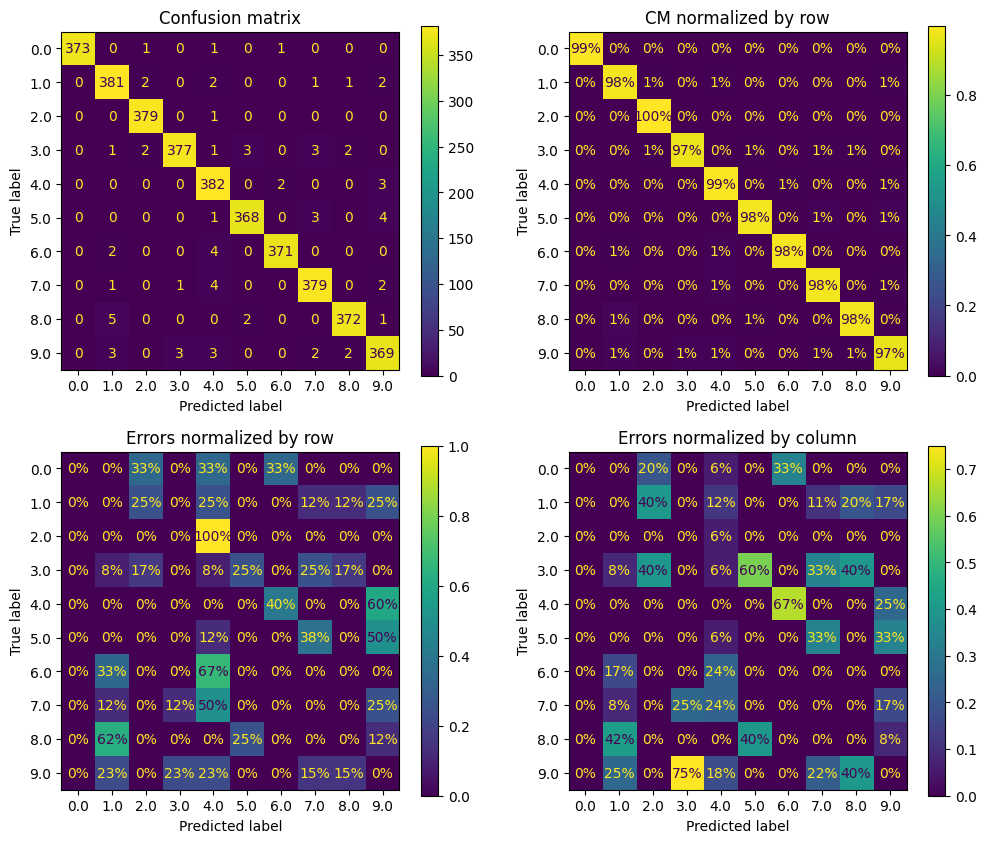

In [33]:
from sklearn.metrics import ConfusionMatrixDisplay

# Función que me resultará útil para analizar los errores de los modelos
def plot_cm_matrices(y_real, y_pred):
  sample_weight = (y_pred != y_real)

  fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
  ConfusionMatrixDisplay.from_predictions(y_real, y_pred, ax=axs[0, 0])
  axs[0, 0].set_title("Confusion matrix")

  ConfusionMatrixDisplay.from_predictions(y_real, y_pred, ax=axs[0, 1],
                                          normalize="true", values_format=".0%")
  axs[0, 1].set_title("CM normalized by row")

  ConfusionMatrixDisplay.from_predictions(y_real, y_pred, ax=axs[1, 0],
                                          sample_weight=sample_weight,
                                          normalize="true", values_format=".0%")
  axs[1, 0].set_title("Errors normalized by row")
  ConfusionMatrixDisplay.from_predictions(y_real, y_pred, ax=axs[1, 1],
                                          sample_weight=sample_weight,
                                          normalize="pred", values_format=".0%")
  axs[1, 1].set_title("Errors normalized by column")

  plt.show()

plot_cm_matrices(y_train, fold_pred)


1. Observamos en las primeras dos matrices que la mayoría de las predicciones son correctas (la diagonal principal tiene valores muy elevados), lo cual concuerda con el accuracy medio calculado.
2. Viendo la segunda matriz, vemos que el 3 y el 9 se predicen peor, con un 97%, mientras que el 2 tiene mucho éxito.
3. De la matriz 3 vemos que los errores cometidos al predecir un 2 son siempre un 4, mientras que al predecir 6 el error más común es predecirlo como un 4.
4. De la matriz 4 vemos que el 75% de los 3 mal predecidos son realmente un 9.

Estos resultados podrán ser de utilidad si entrenamos otro modelo bueno que tenga errores distintos, de forma que podríamos combinar los dos modelos en un $ensemble$ que probablemente sea incluso mejor, o si encontramos una forma de atacar estos errores y producir un modelo que los evite.

Vamos a probar ahora `LogisticRegression`, un algoritmo bastante bueno que se puede usar para tareas de clasificación. Predice la probabilidad de que un ejemplo pertenezca a una clase. Es un algoritmo muy simple y conveniente para problemas como clasificación de dígitos. Tiene como hiperparámetro a $C$, que igual que en `SVC` cuanto mayor su valor, menos regularizado es el modelo, y `penalty`, que es la norma usada para la penalización. Por defecto $C=1$ y penalty $l_2$

In [34]:
from sklearn.linear_model import LogisticRegression

logit_clf = make_pipeline(preprocessing, LogisticRegression())
logit_clf.fit(X_train, y_train)
# Obtenemos los hiperparámetros del modelo LogisticRegression del pipeline
# El último paso del pipeline es el clasificador LogisticRegression, por lo que accedemos a él con el índice [-1]
logit_params = logit_clf[-1].get_params()

# Imprimimos los hiperparámetros del clasificador SVC
print("Hiperparámetros del clasificador LogisticRegression:")
for param_name, param_value in logit_params.items():
    print(f"{param_name}: {param_value}")

Hiperparámetros del clasificador LogisticRegression:
C: 1.0
class_weight: None
dual: False
fit_intercept: True
intercept_scaling: 1
l1_ratio: None
max_iter: 100
multi_class: auto
n_jobs: None
penalty: l2
random_state: None
solver: lbfgs
tol: 0.0001
verbose: 0
warm_start: False


Igual que con `SVC`, mido el rendimiento de mi regresión logística.

In [35]:
# 5-fold cross validation utilizando accuracy como métrica
scores = cross_val_score(logit_clf, X_train, y_train, cv=5, scoring='accuracy')
fold_pred = cross_val_predict(logit_clf, X_train, y_train, cv=5)

# Calculo la media y la desviación estándar
mean_accuracy = scores.mean()
std_accuracy = scores.std()

print("Accuracy media:", mean_accuracy)
print("Std de accuracy:", std_accuracy)

Accuracy media: 0.96311980289498
Std de accuracy: 0.0069286868555450305


96,3%, algo peor que el SVC pero no está mal. Veamos como son los errores

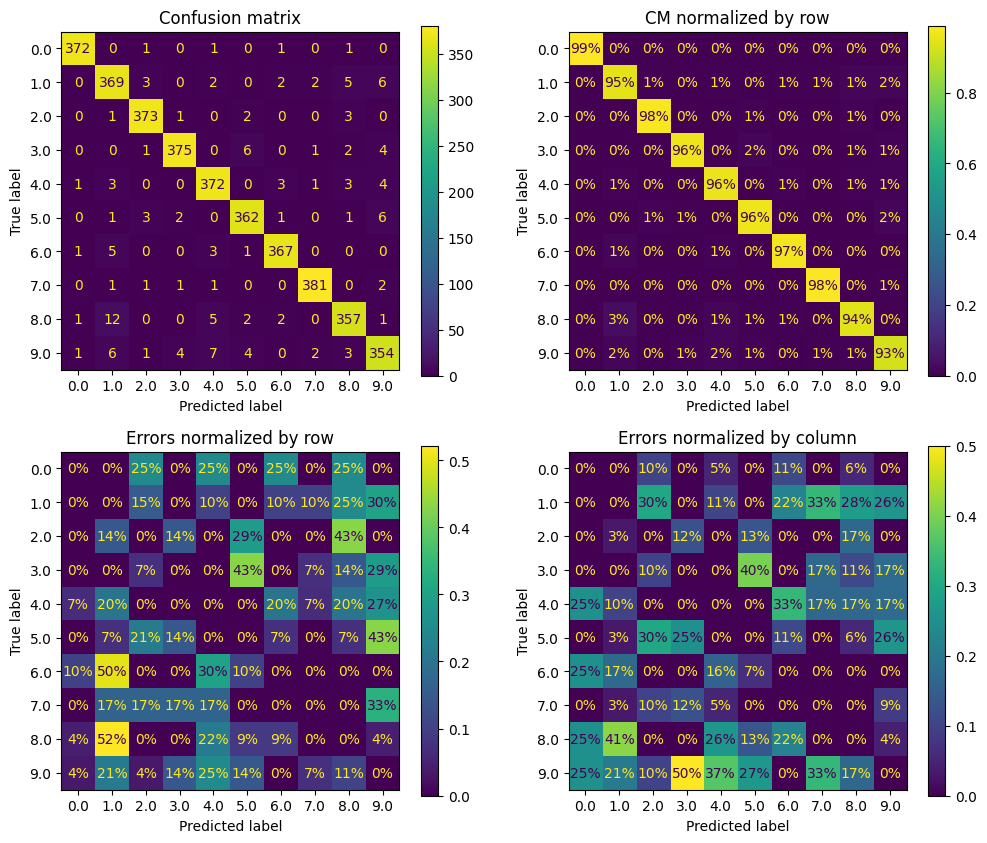

In [36]:
plot_cm_matrices(y_train, fold_pred)

No analizaré extensivamente el resultado, pero una cosa que queda clara es que comete muchos errores distintos del `SVC`. Estoy cada vez más convencido de crear un ensemble que combine algunos modelos más simples como estos.

Ahora quiero probar un KNeighborsClassifier, que suele ser muy efectivo para la clasificación de dígitos con una función de distancia apropiada. Los hiperparámetros más importantes aquí serían $n\text{_}neighbors$ (por defecto $5$), que es el número de vecinos, $weights$, que son los pesos de los vecinos en función de su distancia (por defecto $uniform$), y $p$, que es la potencia de la métrica de Minkowski (por defecto $2$, distancia euclídea).

In [37]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = make_pipeline(preprocessing, KNeighborsClassifier())
knn_clf.fit(X_train, y_train)
# Obtenemos los hiperparámetros del modelo KNeighborsClassifier del pipeline
# El último paso del pipeline es el clasificador KNeighborsClassifier, por lo que accedemos a él con el índice [-1]
knn_params = knn_clf[-1].get_params()

# Imprimimos los hiperparámetros del clasificador KNN
print("Hiperparámetros del clasificador KNN:")
for param_name, param_value in knn_params.items():
    print(f"{param_name}: {param_value}")


Hiperparámetros del clasificador KNN:
algorithm: auto
leaf_size: 30
metric: minkowski
metric_params: None
n_jobs: None
n_neighbors: 5
p: 2
weights: uniform


Calculo el rendimiento.

In [38]:
# 5-fold cross validation utilizando accuracy como métrica
scores = cross_val_score(knn_clf, X_train, y_train, cv=5, scoring='accuracy')
fold_pred = cross_val_predict(knn_clf, X_train, y_train, cv=5)

# Calculo la media y la desviación estándar
mean_accuracy = scores.mean()
std_accuracy = scores.std()

print("Accuracy media:", mean_accuracy)
print("Std de accuracy:", std_accuracy)

Accuracy media: 0.9709653355233889
Std de accuracy: 0.007042179753916179


97%, algo mejor que LogisticRegression pero peor que SVC. Veamos los errores.

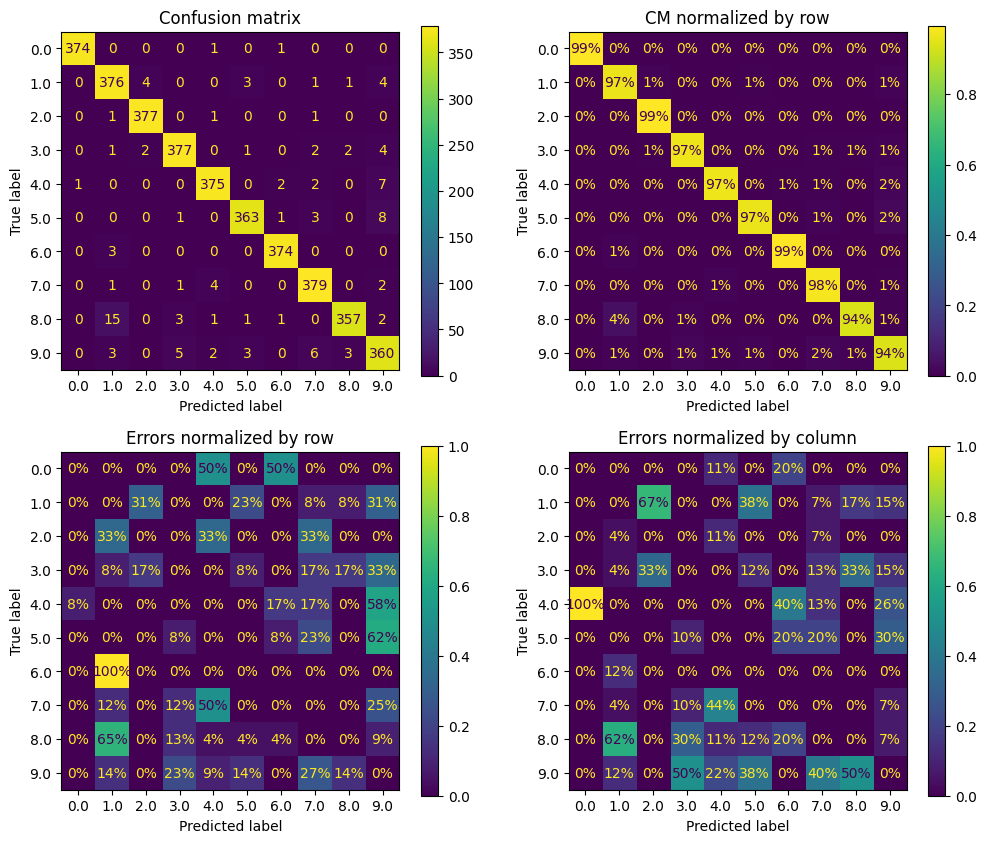

In [39]:
plot_cm_matrices(y_train, fold_pred)

Y otra vez vemos que los errores son distintos. Estoy seguro de que intentaré combinar lo que tengo en un ensemble, de qué tipo está por ver.

Y como último clasificador quiero considerar RandomForest, un clasificador ensemble potentísimo basado en árboles de decisión, muy robusto y que va bastante bien cuando hay muchas dimensiones. En general es muy popular, y en el caso de clasificación de dígitos debería funcionar bien. Los hiperparámetros importantes son $n\text{_}estimators$, el número de árboles (por defecto 100), $max\text{_}depth$, la profundidad máxima del árbol (infinita por defecto),
 $min\text{_}samples\text{_}split$, el mínimo número de ejemplos necesarios para partir un nodo interior (2 por defecto), $min\text{_}samples\text{_}leaf$, el mínimo número de ejemplos necesario para ser un nodo hoja (1 por defecto) y $max\text{_}features$, el máximo número de atributos que se consideran para partir un nodo (por defecto la raíz del número de atributos).

Random Forest es algo más costoso de entrenar en comparación con los clasificadores que hemos visto hasta ahora. Es conveniente poner $n\text{_}jobs=-1$ para tener más cores trabajando y acelerar el proceso. Como hay aleatoriedad pongo $random\text{_}state=42$ para conservar los mismos resultados.

In [40]:
from sklearn.ensemble import RandomForestClassifier

rndf_clf = make_pipeline(preprocessing, RandomForestClassifier(random_state=42, n_jobs=-1))
rndf_clf.fit(X_train, y_train)
# Obtenemos los hiperparámetros del modelo RandomForestClassifier del pipeline
# El último paso del pipeline es el clasificador RandomForestClassifier, por lo que accedemos a él con el índice [-1]
rndf_params = rndf_clf[-1].get_params()

# Imprimimos los hiperparámetros del clasificador Random Forest
print("Hiperparámetros del clasificador Random Forest:")
for param_name, param_value in rndf_params.items():
    print(f"{param_name}: {param_value}")


Hiperparámetros del clasificador Random Forest:
bootstrap: True
ccp_alpha: 0.0
class_weight: None
criterion: gini
max_depth: None
max_features: sqrt
max_leaf_nodes: None
max_samples: None
min_impurity_decrease: 0.0
min_samples_leaf: 1
min_samples_split: 2
min_weight_fraction_leaf: 0.0
monotonic_cst: None
n_estimators: 100
n_jobs: -1
oob_score: False
random_state: 42
verbose: 0
warm_start: False


Calculo el rendimiento.

In [41]:
# 5-fold cross validation utilizando accuracy como métrica
scores = cross_val_score(rndf_clf, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)
fold_pred = cross_val_predict(rndf_clf, X_train, y_train, cv=5, n_jobs=-1)

# Calculo la media y la desviación estándar
mean_accuracy = scores.mean()
std_accuracy = scores.std()

print("Accuracy media:", mean_accuracy)
print("Std de accuracy:", std_accuracy)

Accuracy media: 0.9652123327515998
Std de accuracy: 0.005125774117248372


96,5%, parece que no va tan bien como esperabamos. En cualquier caso no va muy mal, podríamos remediar esto en el paso de fine tuning del clasificador. Veamos qué errores produce.

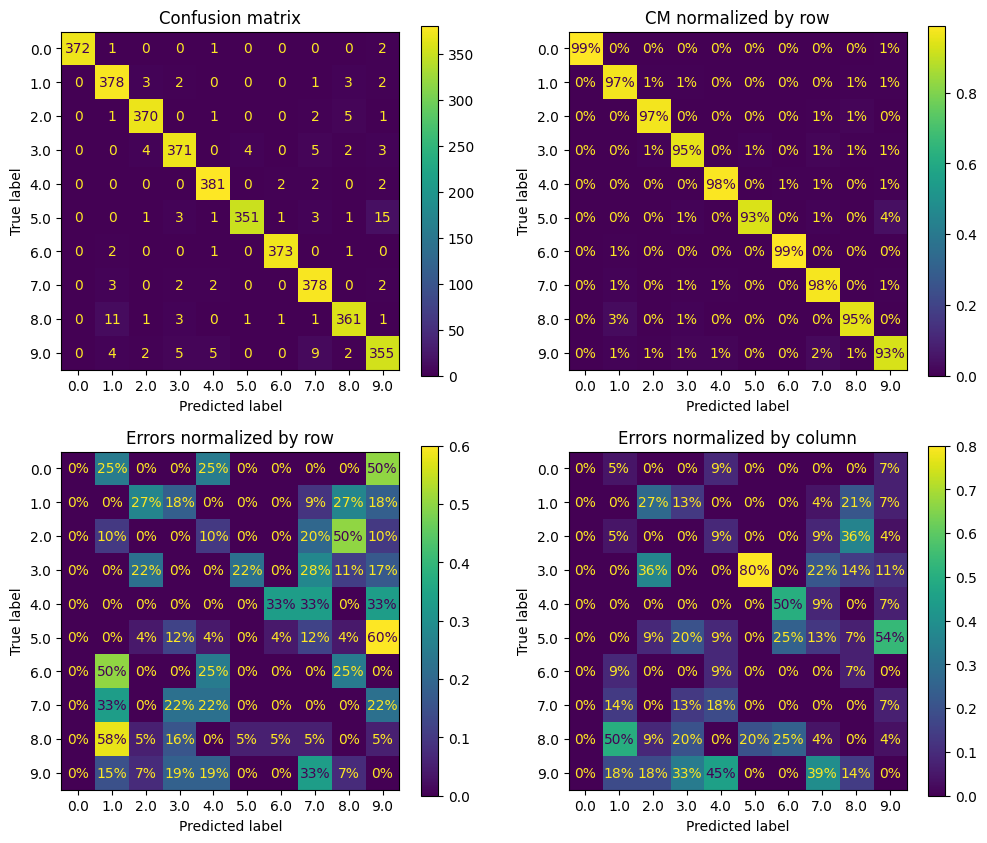

In [42]:
plot_cm_matrices(y_train, fold_pred)

Son relativamente distintos de los demás clasificadores. Finalmente, voy a combinar estos cuatro clasificadores en un ensemble. Usaré `VotingClassifier` y combinaré los modelos que he visto.

In [43]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier([
    ('svc', make_pipeline(preprocessing, SVC(random_state=42))),
    ('lr', make_pipeline(preprocessing, LogisticRegression(random_state=42))),
    ('knn', make_pipeline(preprocessing, KNeighborsClassifier())),
    ('rf', make_pipeline(preprocessing, RandomForestClassifier(random_state=42, n_jobs=-1)))
])

voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('svc',
                              Pipeline(steps=[('pipeline',
                                               Pipeline(steps=[('scaler',
                                                                StandardScaler()),
                                                               ('pca',
                                                                PCA(n_components=0.95))])),
                                              ('svc', SVC(random_state=42))])),
                             ('lr',
                              Pipeline(steps=[('pipeline',
                                               Pipeline(steps=[('scaler',
                                                                StandardScaler()),
                                                               ('pca',
                                                                PCA(n_components=0.95))])),
                                              ('logisticregression',
                                               LogisticRegression(random_state=42))])),
                             ('...
                              Pipeline(steps=[('pipeline',
                                               Pipeline(steps=[('scaler',
                                                                StandardScaler()),
                                                               ('pca',
                                                                PCA(n_components=0.95))])),
                                              ('kneighborsclassifier',
                                               KNeighborsClassifier())])),
                             ('rf',
                              Pipeline(steps=[('pipeline',
                                               Pipeline(steps=[('scaler',
                                                                StandardScaler()),
                                                               ('pca',
                                                                PCA(n_components=0.95))])),
                                              ('randomforestclassifier',
                                               RandomForestClassifier(n_jobs=-1,
                                                                      random_state=42))]))])

Mido el rendimiento

In [44]:
# 5-fold cross validation utilizando accuracy como métrica
scores = cross_val_score(voting_clf, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)

# Calculo la media y la desviación estándar
mean_accuracy = scores.mean()
std_accuracy = scores.std()

print("Accuracy media:", mean_accuracy)
print("Std de accuracy:", std_accuracy)

Accuracy media: 0.9772446360743251
Std de accuracy: 0.006049782944269045


97,7%, no está mal, pero podría mejorar. Por defecto `VotingClassifier` hace hard voting, es decir la predicción se hace escogiendo la clase por la cual ha votado la mayoría de los clasificadores. Normalmente soft voting va mucho mejor, ya que predice la clase con mayor probabilidad, tomada como media de todos los clasificadores. Para eso los clasificadores tienen que poder estimar la probabilidad, es decir tener un método $predict\text{_}proba()$. `SVC` no lo tiene por defecto, así que ponemos su hiperparámetro $probability$ a $true$ para que use validación cruzada para estimar la probabilidad. Ralentizará el entrenamiento pero es aceptable. También ponemos el hiperparámetro del $VotingClassifier$ voting a soft, cambiando la forma de votar.

In [45]:
voting_clf.voting = "soft"
voting_clf.named_estimators["svc"].steps[-1][1].probability = True
voting_clf.fit(X_train, y_train)

# 5-fold cross validation utilizando accuracy como métrica
scores = cross_val_score(voting_clf, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)

# Calculo la media y la desviación estándar
mean_accuracy = scores.mean()
std_accuracy = scores.std()

print("Accuracy media:", mean_accuracy)
print("Std de accuracy:", std_accuracy)

Accuracy media: 0.9816918180884919
Std de accuracy: 0.00629214379367833


98,2%, ¡mucho mejor! Nos quedamos con este modelo y en el apartado siguiente lo tuneamos.

###  <font color='blue'> 5. Selección y estimación de valores para hiperparámetros (incluyendo el tipo de regularización a usar).

Vamos a buscar los mejores hiperparámetros usando GridSearchCV, que recibe un grid de hiperparámetros a evaluar para los estimadores. Los hiperparámetros que evaluaré serán el $C$ del `SVC` y del `LogisticRegression` para regularizarlos, el $n\text{_}neighbors$ del `KNN` para ver cuantos vecinos son mejores, y la profundidad del `Random Forest`.

In [46]:
from sklearn.model_selection import GridSearchCV

# Defino el grid de parametros
param_grid = {
    'svc__svc__C': [0.1, 10],                             # Regularizo SVC
    'lr__logisticregression__C': [0.1, 10],               # Regularizo Logistic Regression
    'knn__kneighborsclassifier__n_neighbors': [3, 4, 5],  # Número de vecinos para KNN
    'rf__randomforestclassifier__max_depth': [None, 10],  # Máxima profundidad de Random Forest
}

# Hago grid search
grid_search = GridSearchCV(estimator=voting_clf, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=VotingClassifier(estimators=[('svc',
                                                     Pipeline(steps=[('pipeline',
                                                                      Pipeline(steps=[('scaler',
                                                                                       StandardScaler()),
                                                                                      ('pca',
                                                                                       PCA(n_components=0.95))])),
                                                                     ('svc',
                                                                      SVC(probability=True,
                                                                          random_state=42))])),
                                                    ('lr',
                                                     Pipeline(steps=[('pipeline',
                                                                      Pipeline(steps=[('scaler',
                                                                                       StandardScaler()),
                                                                                      ('pca',
                                                                                       PCA(n_components=0.95))])),
                                                                     ('logisticregressio...
                                                                      Pipeline(steps=[('scaler',
                                                                                       StandardScaler()),
                                                                                      ('pca',
                                                                                       PCA(n_components=0.95))])),
                                                                     ('randomforestclassifier',
                                                                      RandomForestClassifier(n_jobs=-1,
                                                                                             random_state=42))]))],
                                        voting='soft'),
             n_jobs=-1,
             param_grid={'knn__kneighborsclassifier__n_neighbors': [3, 4, 5],
                         'lr__logisticregression__C': [0.1, 10],
                         'rf__randomforestclassifier__max_depth': [None, 10],
                         'svc__svc__C': [0.1, 10]},
             scoring='accuracy')

Veamos los resultados que hemos obtenido, sacando el mejor accuracy y los parámetros del clasificador final.

In [47]:
# Mejor rendimiento y parámetros
best_score = grid_search.best_score_
best_params = grid_search.best_params_

# Mejor clasificador
final_model = grid_search.best_estimator_

print(f"Mejor accuracy: {best_score}")
print(f"Mejores parametros: {best_params}")

Mejor accuracy: 0.9835212033531361
Mejores parametros: {'knn__kneighborsclassifier__n_neighbors': 3, 'lr__logisticregression__C': 10, 'rf__randomforestclassifier__max_depth': None, 'svc__svc__C': 10}


Un 98,35%, una peqeña mejora pero no está mal.

###  <font color='blue'> 6. Entrenamiento y estimación del error fuera de la muestra. Discusión de resultados y extracción de conclusiones.

Finalmente, vamos a evaluar en el conjunto de test.

In [48]:
final_pred = final_model.predict(X_test)
score = accuracy_score(y_test, final_pred)
print(f"Evaluación final: {score}")

Evaluación final: 0.9727323316638843


Aunque es menor que el accuracy obtenido en el entrenamiento, en general no es un mal resultado. Como conclusión puedo decir que los ensemble, SVC y KNN son bastante buenos para tareas de clasificación como esta.

---

## <font color='blue'> Ejercicio 3: PROBLEMA DE REGRESIÓN (4 puntos).

<font color='blue'> En este ejercicio los alumnos se enfrentarán a un problema de regresión, que tendrán que abordar de comienzo a fin (desde el análisis exploratorio hasta el entrenamiento y validación de los modelos de aprendizaje automático seleccionados). Más concretamente, se enfrentarán al problema $\textit{YearPredictionMSD}$ (https://archive.ics.uci.edu/dataset/203/yearpredictionmsd). Este conjunto de datos contiene información (características sonoras) de distintas canciones, y el objetivo es predecir el año de publicación de la canción (hay 89 posibles años a predecir). Cada fila/ejemplo contiene 90 valores reales y un valor entero, correspondiente con el año de la canción, en el rango $[1922, 2011]$). En total hay 515345 ejemplos/instancias. El alumnado debe realizar, al menos, las siguientes tareas (que deben ser descritas y abordadas, explícitamente, en la documentación entregada; de hecho, se debe incluir un subapartado en el Notebook para cada una de ellas):
1. <font color='blue'> Análisis descriptivo del problema y análisis exploratorio de los datos a nuestra disposición.
2. Preprocesado de datos (selección/extracción de características, reducción de dimensionalidad, procesado de datos extremos/atípicos, imputación de datos faltantes, escalado de variables, codificación/transformación de datos, desbalanceo de datos).
3. Definición del protocolo de validación experimental (entrenamiento, validación y test), junto con las métricas de evaluación del rendimiento que corresponda.
4. Selección de, al menos, 3 modelos de aprendizaje automático a emplear en la resolución del problema, de los cuales 1 por lo menos debe ser un $ensemble$.
5. Selección y estimación de valores para hiperparámetros (incluyendo el tipo de regularización a usar).
6. Entrenamiento y estimación del error fuera de la muestra. Discusión de resultados y extracción de conclusiones.


In [51]:
# a cubrir por el alumnado